# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
     d_w Q = d_w [\dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw) \right] = \dfrac{1}{\ell} (d_w[\left( y - Xw \right)^T]\left( y - Xw \right) + \left( y - Xw \right)^T d_w[\left( y - Xw )\right]) = \dfrac{1}{\ell} (d_w[\left(- Xw \right)^T]\left( y - Xw \right) - \left( y - Xw \right)^T X d w) = \dfrac{1}{\ell} (-d w^T X^T \left( y - Xw \right) - \left( y - Xw \right)^T X d w) = -\dfrac{2}{\ell}(y - Xw)^T X d w
$$

$$
    w = \left(X^T X \right)^-1 X^T y
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

In [ ]:
def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
    return (1.0/y.shape[0]) * (y - self.predict(x)).T @ (y - self.predict(x))


def predict(self, x: np.ndarray) -> np.ndarray:
    return x @ self.w

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [134]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [136]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [143]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)
    
    print(descent_config)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

{'descent_name': 'full', 'kwargs': {'dimension': 5}}
{'descent_name': 'stochastic', 'kwargs': {'dimension': 5}}
{'descent_name': 'momentum', 'kwargs': {'dimension': 5}}
{'descent_name': 'adam', 'kwargs': {'dimension': 5}}


In [144]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

print(descent_config)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

{'descent_name': 'stochastic', 'kwargs': {'dimension': 5, 'batch_size': 10}}


Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

Ник: yammorozov@edu.hse.ru

* **VanillaGradientDescent**: 73657836


* **StochasticDescent**: 73657976


* **MomentumDescent**: 73659586


* **Adam**: 73679081


* **LinearRegression**: 73680245

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [563]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [564]:
data = pd.read_csv('autos.csv')

In [565]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

Text(0.5, 1.0, 'Распределение стоимости автомобилей')

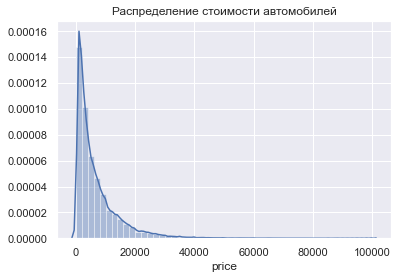

In [566]:
#посмотрим на распрделение цены 
sns.distplot(data.price)
plt.title('Распределение стоимости автомобилей')

ну такое себе...

Text(0.5, 1.0, 'Распределение логарифма стоимости автомобилей')

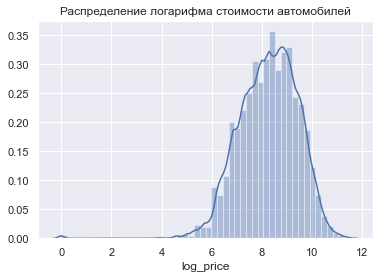

In [567]:
#будем смотреть на логарифм 
data['log_price'] = np.log(data.price)
sns.distplot(data.log_price)
plt.title('Распределение логарифма стоимости автомобилей')

ооо, так-то лучше)


In [569]:
#посмотрим на типы столбцов 
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
log_price            float64
dtype: object

In [570]:
#проверим на наличие нанов
data.isna().sum()

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
log_price            0
dtype: int64

nan-ов нет, супер

In [571]:
# посмотрим на числом уникальных элементов в каждом из признаков:
data.nunique()

brand                  38
model                 249
vehicleType             8
gearbox                 2
fuelType                7
notRepairedDamage       2
powerPS               406
kilometer              13
autoAgeMonths         594
log_price            4919
dtype: int64

Text(0.5, 1.0, 'распределений логарифма стоимости в зависимости от бренда\n')

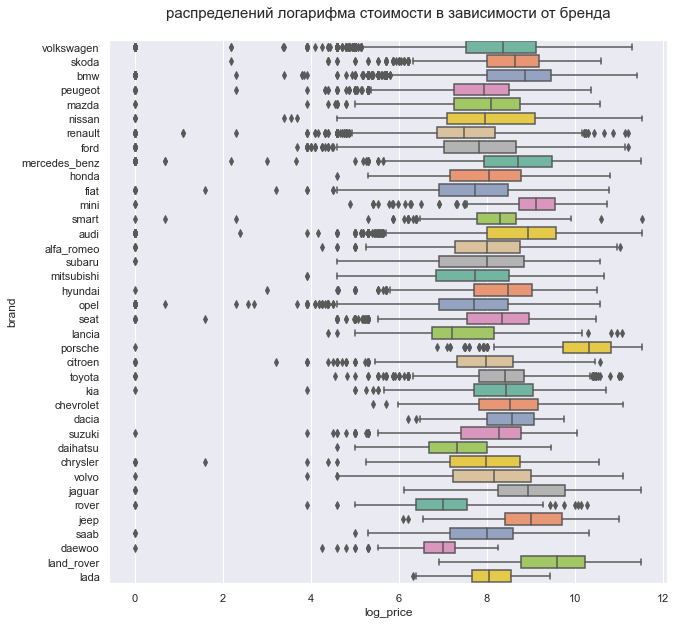

In [572]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(data=data, x="log_price", y="brand", orient="h", palette="Set2")
ax.figure.set_size_inches(10, 10)
ax.set_title('распределений логарифма стоимости в зависимости от бренда\n', fontsize=15)

цена значительно зависит от бренда, возьмём этот признак категореальным

Text(0.5, 1.0, 'Log of Price by model for volvo')

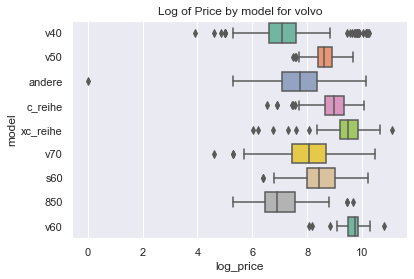

In [713]:
#рассмотрим зависимость цены от модели (на примере brend=volvo)
sns.boxplot(data=data[data.brand=='volvo'], x="log_price", y="model", orient="h", palette="Set2").set_title('Log of Price by model for volvo')

цена достаточно зависит от модели автомобиля, возьмём этот признак категореальным

Text(0.5, 1.0, 'Log of Price by vehicleType')

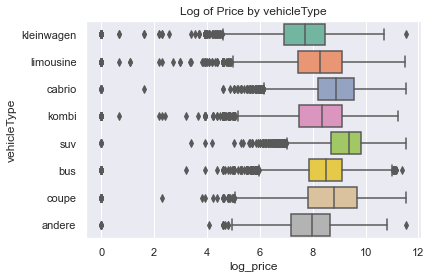

In [712]:
sns.boxplot(data=data, x="log_price", y="vehicleType", orient="h", palette="Set2").set_title('Log of Price by vehicleType')

Text(0.5, 1.0, 'Log of Price by gearbox')

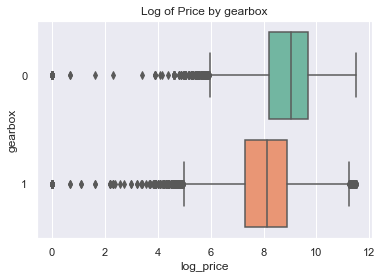

In [711]:
sns.boxplot(data=data, x="log_price", y="gearbox", orient="h", palette="Set2").set_title('Log of Price by gearbox')

сделаем gearbox бинарным признаком

Text(0.5, 1.0, 'Log of Price by powerPS')

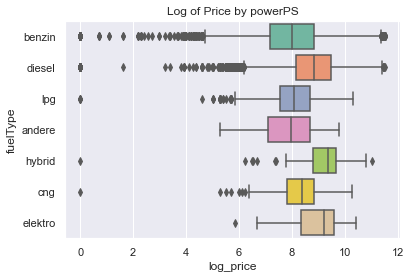

In [709]:
sns.boxplot(data=data, x="log_price", y="fuelType", orient="h", palette="Set2").set_title('Log of Price by powerPS')

Text(0.5, 1.0, 'Log of Price by notRepairedDamage')

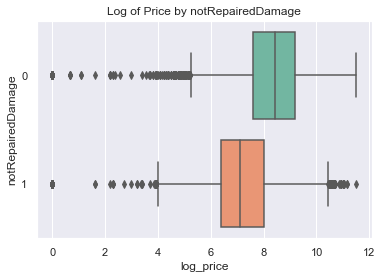

In [710]:
sns.boxplot(data=data, x="log_price", y="notRepairedDamage", orient="h", palette="Set2").set_title('Log of Price by notRepairedDamage')

сделаем notRepairedDamage бинарным признаком

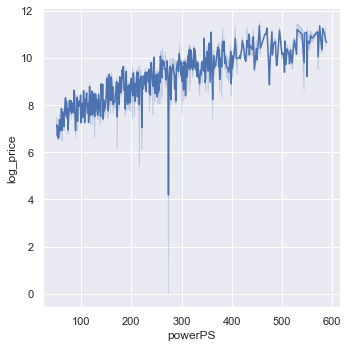

In [704]:
sns.relplot(data=data, x="powerPS", y="log_price", kind="line", legend="full")

линейность просматривается

Text(0.5, 1.0, 'Log of Price by kilometers')

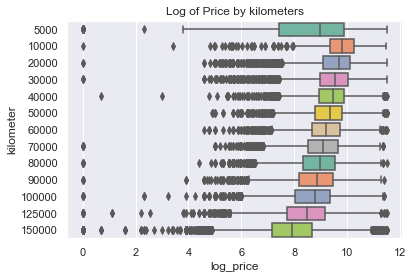

In [708]:
sns.boxplot(data=data, x="log_price", y="kilometer", orient="h", palette="Set2").set_title('Log of Price by kilometers')

Text(0.5, 1.0, 'Log of Price by Kilometer')

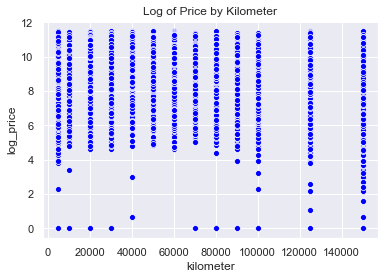

In [94]:
sns.scatterplot(data=data, x='kilometer', y='log_price', color='blue').set_title('Log of Price by Kilometer')

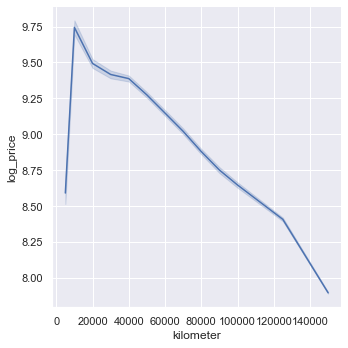

In [78]:
sns.relplot(data=data, x="kilometer", y="log_price", kind="line", legend="full")

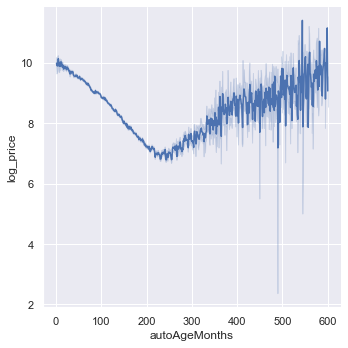

In [76]:
sns.relplot(data=data, x="autoAgeMonths", y="log_price", kind="line", legend="full")

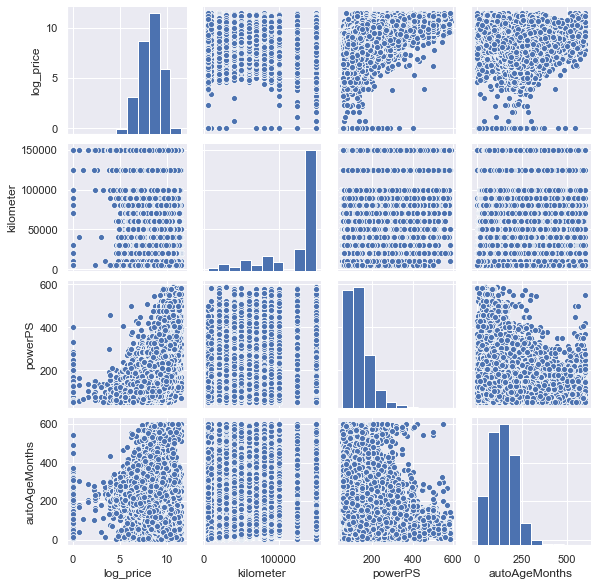

In [528]:
sns.pairplot(data[['log_price', 'kilometer', 'powerPS', 'autoAgeMonths']], height=2)

просто прикольную штуку нашёл)

на самом деле всё равно, что я делаю разбиение только сейчас, а не выре, так как выбросы я никак не обрабатывал(

In [573]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType', 'kilometer']
numeric = ['powerPS', 'autoAgeMonths']
other = ['notRepairedDamage', 'gearbox']

# YOUR CODE (EDA):

In [574]:
data.notRepairedDamage = 1 * (data.notRepairedDamage == 'ja')
data.gearbox = 1 * (data.gearbox == 'manuell')

In [575]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [576]:
#data = data.drop(columns = 'bias')

In [577]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(x, test_size=0.2)
x_test, x_val = train_test_split(x_test, test_size=0.5)

y_train, y_test = train_test_split(y, test_size=0.2)
y_test, y_val = train_test_split(y_test, test_size=0.5)

In [578]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

#x_train = column_transformer.fit_transform(x_train)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [631]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [632]:
lambdas = np.logspace(-4, 0, 10)
reg_vgd = None
vgd_mse = np.inf
lambda_vgd = None


for lambd in lambdas:
    
    descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': column_transformer.transform(x_train).shape[1],
        'lambda_' : lambd 
        }
    }
    
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent_config = descent_config
            )
        )
    ]) 
    regression = pipeline.fit(x_train, y_train)
    y_pred = regression.predict(x_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if mse < vgd_mse:
        lambda_vgd = lambd
        vgd_mse = mse
        reg_vgd = regression

In [633]:
lambdas = np.logspace(-8, 0, 10)
reg_sgd = None
sgd_mse = np.inf
lambda_sgd = None


for lambd in lambdas:
    
    descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': column_transformer.transform(x_train).shape[1],
        'lambda_' : lambd
        }
    }
    
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent_config = descent_config
            )
        )
    ]) 
    regression = pipeline.fit(x_train, y_train.reset_index(drop=True))
    y_pred = regression.predict(x_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if mse < sgd_mse:
        lambda_sgd = lambd
        sgd_mse = mse
        reg_sgd = regression

In [634]:
lambdas = np.logspace(-6, 0, 10)
reg_md = None
md_mse = np.inf
lambda_md = None


for lambd in lambdas:
    
    descent_config = {
    'descent_name': 'momentum',
    'kwargs': {
        'dimension': column_transformer.transform(x_train).shape[1],
        'lambda_' : lambd
        }
    }
    
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent_config = descent_config
            )
        )
    ]) 
    regression = pipeline.fit(x_train, y_train.reset_index(drop=True))
    y_pred = regression.predict(x_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if mse < md_mse:
        lambda_md = lambd
        md_mse = mse
        reg_md = regression

In [635]:
lambdas = np.logspace(-5, 0, 10)
reg_adam = None
adam_mse = np.inf
lambda_adam = None


for lambd in lambdas:
    
    descent_config = {
    'descent_name': 'adam',
    'kwargs': {
        'dimension': column_transformer.transform(x_train).shape[1],
        'lambda_' : lambd
        }
    }
    
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent_config = descent_config
            )
        )
    ]) 
    regression = pipeline.fit(x_train, y_train.reset_index(drop=True))
    y_pred = regression.predict(x_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if mse < adam_mse:
        lambda_adam = lambd
        adam_mse = mse
        reg_adam = regression

In [636]:
regs = [(reg_vgd, 'VanillaGradientDescent'), (reg_sgd, 'StochasticDescent'), 
             (reg_md, 'MomentumDescent'), (reg_adam, 'Adam')]
for reg, name in regs:
    print(name)
    y_train_pred = reg.predict(x_train)
    mse_train = mean_squared_error(y_train_pred, y_train)
    r2_train = r2_score(y_train, y_train_pred)
    y_pred = reg.predict(x_test)
    mse_test = mean_squared_error(y_pred, y_test)
    r2_test = r2_score(y_test, y_pred)
    print('Train:','\tMSE:', mse_train,  '\tR2:', r2_train)
    print('Test:','\tMSE:', mse_test,  '\tR2:', r2_test)
    print('Number of steps:', len(reg[1].loss_history) - 1, '\n')

VanillaGradientDescent
Train: 	MSE: 1.428393091169958 	R2: -0.06273657958602774
Test: 	MSE: 1.434718865112803 	R2: -0.06347864212530152
Number of steps: 63 

StochasticDescent
Train: 	MSE: 1.7062411382857485 	R2: -0.2694578841497717
Test: 	MSE: 1.723832789662584 	R2: -0.27778298521034483
Number of steps: 120 

MomentumDescent
Train: 	MSE: 1.361091418275005 	R2: -0.012663563905017217
Test: 	MSE: 1.3701741493113329 	R2: -0.015635173703692606
Number of steps: 102 

Adam
Train: 	MSE: 1.3435144253549018 	R2: 0.0004138679663578948
Test: 	MSE: 1.3540607247596903 	R2: -0.0036911731898203737
Number of steps: 149 



### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

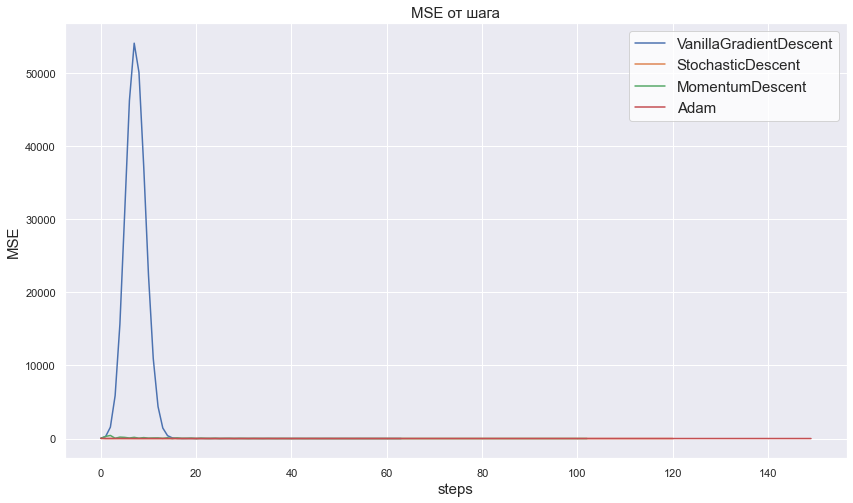

In [698]:
plt.figure(figsize=(14, 8))
plt.plot(reg_vgd[1].loss_history, label='VanillaGradientDescent')
plt.plot(reg_sgd[1].loss_history, label='StochasticDescent')
plt.plot(reg_md[1].loss_history, label='MomentumDescent')
plt.plot(reg_adam[1].loss_history, label='Adam')


plt.legend(facecolor='white', fontsize=15)
plt.title('MSE от шага', size=15)
plt.ylabel('MSE', size=15)
plt.xlabel('steps', size=15)
plt.show()

не очень понятно, поэто возьмём логарифм ошибки

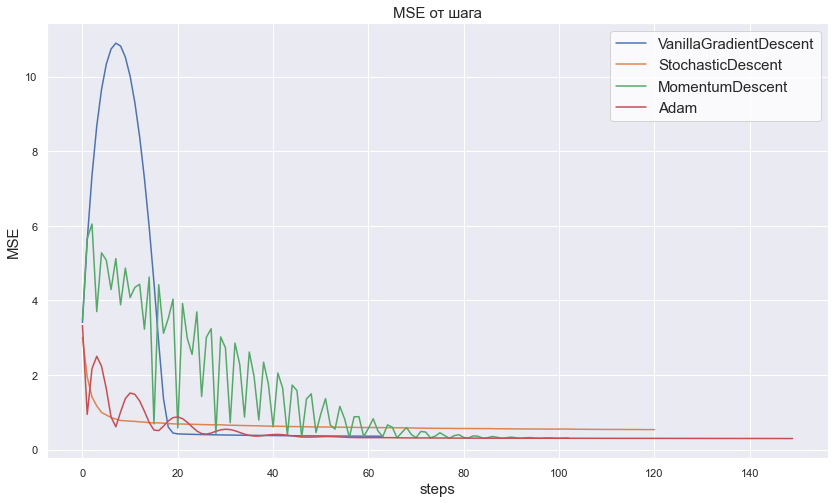

In [699]:
plt.figure(figsize=(14, 8))
plt.plot(np.log(reg_vgd[1].loss_history), label='VanillaGradientDescent')
plt.plot(np.log(reg_sgd[1].loss_history), label='StochasticDescent')
plt.plot(np.log(reg_md[1].loss_history), label='MomentumDescent')
plt.plot(np.log(reg_adam[1].loss_history), label='Adam')


plt.legend(facecolor='white', fontsize=15)
plt.title('MSE от шага', size=15)
plt.ylabel('MSE', size=15)
plt.xlabel('steps', size=15)
plt.show()

1) в среднем MSE на кажом шаге было меньше у Adam (R2 так же наилучшее среди других моделей), но он и сходится дольше остальных (требуемое количество итераций)

2) VanillaGradientDescent сходится быстрее всех, но и MSE, R2 не самое оптимальное 

3) MomentumDescent имеет среднее количество шагов до сходимости и ошибки MSE, R2 по сравнению с другими методами,
что делает его усреднённым алгоритмом во всех смыслах

4) StochasticDescent показал наихудшее значение MSE, R2 по сравнению с другими алгоритмами 
(но, тем не менее, он преднозначин для уменьшения количества вычислений, что ведёт к уменьшению времени работы. 
 Так что для первичного анализа, дабы не тратить много времени на вычисления сойдёт)

`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [638]:
import time
batch_sizes = np.arange(5, 500, 10)

In [641]:
steps = []
times = []

for batch_size in batch_sizes:
    cur_times = []
    cur_steps = []
    for i in range(10):
        descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': column_transformer.transform(x_train).shape[1],
            'batch_size': batch_size,
            'lambda_' : lambda_sgd
            }
        }

        pipeline = Pipeline(steps=[
            ('col_transform', column_transformer),
            ('regression', LinearRegression(
                descent_config = descent_config
                )
            )
        ]) 
        
        start_time = time.time()
        regression = pipeline.fit(x_train, y_train.reset_index(drop=True))
        cur_times.append(time.time() - start_time)
        cur_steps.append(len(regression[1].loss_history) - 1)
        
    steps.append(np.mean(cur_steps))
    times.append(np.mean(cur_times))

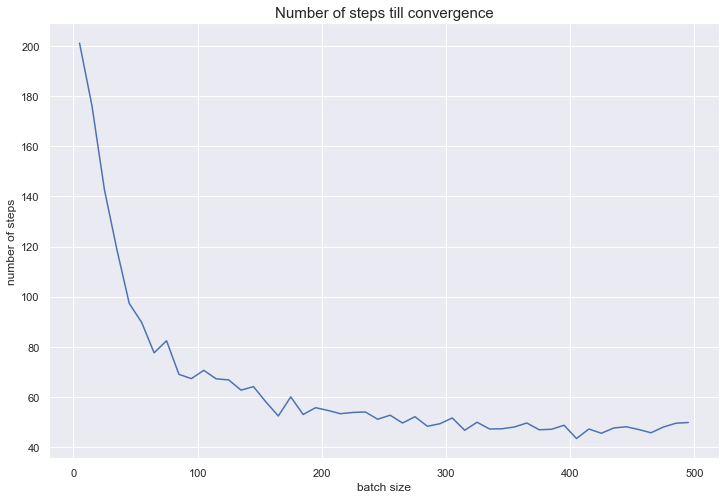

In [642]:
plt.figure(figsize=(12,8))
plt.plot(batch_sizes, [step for step in steps])
plt.title('Number of steps till convergence', size=15)
plt.ylabel('number of steps', size=12)
plt.xlabel('batch size', size=12)
plt.show()

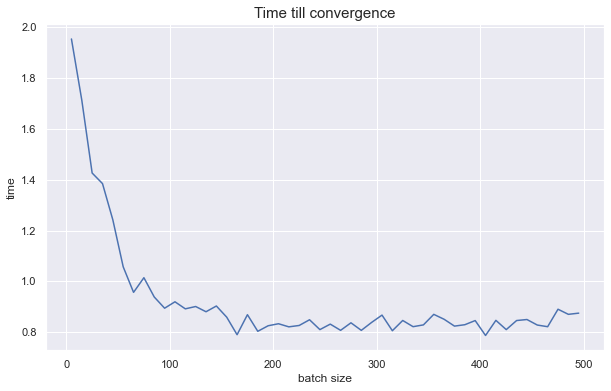

In [643]:
plt.figure(figsize=(10,6))
plt.plot(batch_sizes, [time for time in times])
plt.title('Time till convergence', size=15)
plt.ylabel('time', size=12)
plt.xlabel('batch size', size=12)
plt.show()

Как показывают результаты, при увеличении батча, количество шагов шагов до сходимости занчительно падает (количество шагов уменьшается гиперболически). 

А вот время работы значительно падает при размере батка от 5 до 150 (из-за уменьшения количества шагов), после чего ведёт себя относительно стабильно (правда видимо время работы начинает снова увеличиватьтся при достижении размера батча в 450, так как мы приближаемся к классическому градиентному спуску. Так что перебарщивать с размером батча тоже не стоит)

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

Ник: yammorozov@edu.hse.ru

* **BaseDescentReg**: 73954721

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [652]:
mus = np.logspace(-4, 0, 10)
reg_vgdr = None
vgdr_mse = np.inf
mu_vgdr = None

for mu in mus:
    descent_config = {
    'descent_name': 'full',
    'regularized': True,
    'kwargs': {
        'dimension': column_transformer.transform(x_train).shape[1],
        'lambda_' : lambda_vgd,
        'mu': mu
        }
    }
    
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent_config = descent_config
            )
        )
    ]) 
    regression = pipeline.fit(x_train, y_train)
    y_pred = regression.predict(x_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if mse < vgdr_mse:
        reg_vgdr = regression
        vgdr_mse = mse
        mu_vgdr = mu

In [665]:
y_predict_vgdr = reg_vgdr.predict(x_test)
y_predict_vgd = reg_vgd.predict(x_test)

print('с регуляризацией:')
print('MSE:', mean_squared_error(y_predict_vgdr, y_test),
      '\tR2:', r2_score(y_test, y_predict_vgdr), 
      '\tNumber of steps:', len(reg_vgdr[1].loss_history) - 1)

print('без регуляризации:')
print('MSE:', mean_squared_error(y_predict_vgd, y_test),
      '\tR2:', r2_score(y_test, y_predict_vgd), 
      '\tNumber of steps:', len(reg_vgd[1].loss_history) - 1)

с регуляризацией:
MSE: 1.4970352369228885 	R2: -0.10967036099529381 	Number of steps: 139
без регуляризации:
MSE: 1.434718865112803 	R2: -0.06347864212530152 	Number of steps: 63


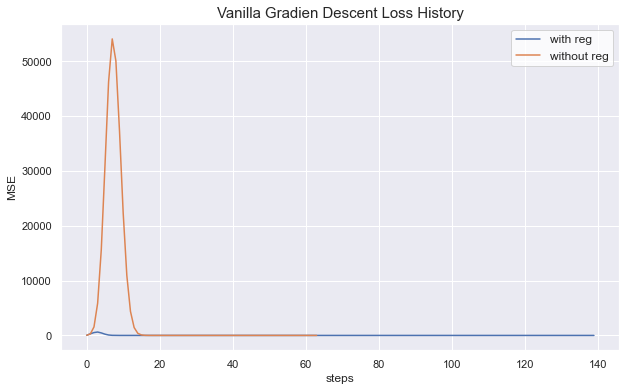

In [666]:
plt.figure(figsize=(10,6))
plt.ylabel('MSE')
plt.xlabel('steps')
plt.title('Vanilla Gradien Descent Loss History', size=15)
plt.plot(reg_vgdr[1].loss_history, label='with reg')
plt.plot(reg_vgd[1].loss_history, label='without reg')
plt.legend(facecolor='white', fontsize=12)
plt.show()

In [693]:
mus = np.logspace(-8, 0, 10)
reg_sgdr = None
sgdr_mse = np.inf
mu_sgdr = None


for mu in mus:
    
    descent_config = {
    'descent_name': 'stochastic',
    'regularized': True,
    'kwargs': {
        'dimension': column_transformer.transform(x_train).shape[1],
        'lambda_' : lambda_sgd,
        'mu': mu
        }
    }
    
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent_config = descent_config
            )
        )
    ]) 
    regression = pipeline.fit(x_train, y_train.reset_index(drop=True))
    y_pred = regression.predict(x_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if mse < sgdr_mse:
        mu_sgdr = mu
        sgdr_mse = mse
        reg_sgdr = regression

In [694]:
y_predict_sgdr = reg_sgdr.predict(x_test)
y_predict_sgd = reg_sgd.predict(x_test)

print('с регуляризацией:')
print('MSE:', mean_squared_error(y_predict_sgdr, y_test),
      '\tR2:', r2_score(y_test, y_predict_sgdr), 
      '\tNumber of steps:', len(reg_sgdr[1].loss_history) - 1)

print('без регуляризации:')
print('MSE:', mean_squared_error(y_predict_sgd, y_test),
      '\tR2:', r2_score(y_test, y_predict_sgd), 
      '\tNumber of steps:', len(reg_sgd[1].loss_history) - 1)

с регуляризацией:
MSE: 2.358526265117331 	R2: -0.7482465525722564 	Number of steps: 168
без регуляризации:
MSE: 1.723832789662584 	R2: -0.27778298521034483 	Number of steps: 120


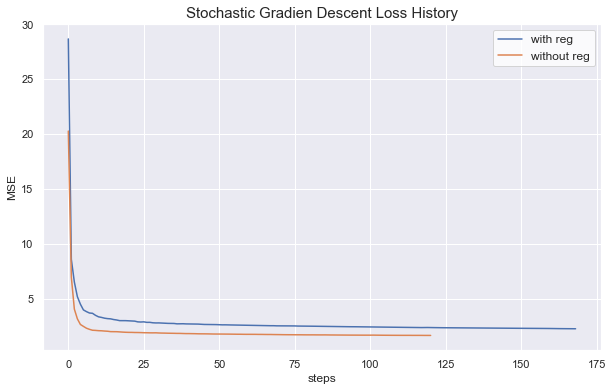

In [695]:
plt.figure(figsize=(10,6))
plt.ylabel('MSE')
plt.xlabel('steps')
plt.title('Stochastic Gradien Descent Loss History', size=15)
plt.plot(reg_sgdr[1].loss_history, label='with reg')
plt.plot(reg_sgd[1].loss_history, label='without reg')
plt.legend(facecolor='white', fontsize=12)
plt.show()

In [683]:
mus = np.logspace(-6, 0, 10)
reg_mdr = None
mdr_mse = np.inf
mu_mdr = None


for mu in mus:
    
    descent_config = {
    'descent_name': 'momentum',
    'regularized': True,
    'kwargs': {
        'dimension': column_transformer.transform(x_train).shape[1],
        'lambda_' : lambda_md,
        'mu': mu
        }
    }
    
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent_config = descent_config
            )
        )
    ]) 
    regression = pipeline.fit(x_train, y_train.reset_index(drop=True))
    y_pred = regression.predict(x_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if mse < mdr_mse:
        mu_mdr = mu
        mdr_mse = mse
        reg_mdr = regression

In [686]:
y_predict_mdr = reg_sgdr.predict(x_test)
y_predict_md = reg_sgd.predict(x_test)

print('с регуляризацией:')
print('MSE:', mean_squared_error(y_predict_mdr, y_test),
      '\tR2:', r2_score(y_test, y_predict_mdr), 
      '\tNumber of steps:', len(reg_mdr[1].loss_history) - 1)

print('без регуляризации:')
print('MSE:', mean_squared_error(y_predict_md, y_test),
      '\tR2:', r2_score(y_test, y_predict_md), 
      '\tNumber of steps:', len(reg_md[1].loss_history) - 1)

с регуляризацией:
MSE: 2.3863024902677936 	R2: -0.7688355494305767 	Number of steps: 211
без регуляризации:
MSE: 1.723832789662584 	R2: -0.27778298521034483 	Number of steps: 102


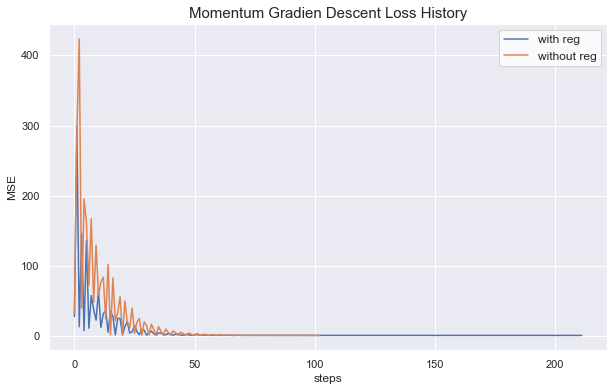

In [691]:
plt.figure(figsize=(10,6))
plt.ylabel('MSE')
plt.xlabel('steps')
plt.title('Momentum Gradien Descent Loss History', size=15)
plt.plot(reg_mdr[1].loss_history, label='with reg')
plt.plot(reg_md[1].loss_history, label='without reg')
plt.legend(facecolor='white', fontsize=12)
plt.show()

In [689]:
mus = np.logspace(-5, 0, 10)
reg_adamr = None
adamr_mse = np.inf
mu_adamr = None


for mu in mus:
    
    descent_config = {
    'descent_name': 'adam',
    'regularized': True,
    'kwargs': {
        'dimension': column_transformer.transform(x_train).shape[1],
        'lambda_' : lambda_adam,
        'mu': mu
        }
    }
    
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent_config = descent_config
            )
        )
    ]) 
    regression = pipeline.fit(x_train, y_train.reset_index(drop=True))
    y_pred = regression.predict(x_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if mse < adamr_mse:
        mu_adamr = mu
        adamr_mse = mse
        reg_adamr = regression

In [690]:
y_predict_adamr = reg_sgdr.predict(x_test)
y_predict_adam = reg_sgd.predict(x_test)

print('с регуляризацией:')
print('MSE:', mean_squared_error(y_predict_adamr, y_test),
      '\tR2:', r2_score(y_test, y_predict_adamr), 
      '\tNumber of steps:', len(reg_adamr[1].loss_history) - 1)

print('без регуляризации:')
print('MSE:', mean_squared_error(y_predict_adam, y_test),
      '\tR2:', r2_score(y_test, y_predict_adam), 
      '\tNumber of steps:', len(reg_adam[1].loss_history) - 1)

с регуляризацией:
MSE: 2.3863024902677936 	R2: -0.7688355494305767 	Number of steps: 250
без регуляризации:
MSE: 1.723832789662584 	R2: -0.27778298521034483 	Number of steps: 149


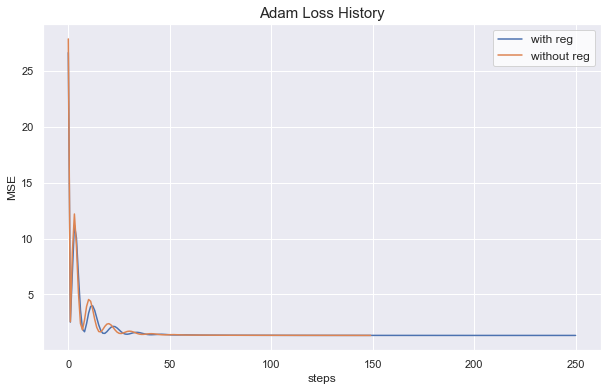

In [692]:
plt.figure(figsize=(10,6))
plt.ylabel('MSE')
plt.xlabel('steps')
plt.title('Adam Loss History', size=15)
plt.plot(reg_adamr[1].loss_history, label='with reg')
plt.plot(reg_adam[1].loss_history, label='without reg')
plt.legend(facecolor='white', fontsize=12)
plt.show()

про сравнения всех методов, в целом, можно сказать следующее:
    
    1) увеличение количество шагов до сходимости (оно и понятно, ведь мы занулили часть параметров, что затрудняет поиск минимума)
    
    2) увеличение ошибки MSE (так же из-за того, что мы занулили часть параметров, следовательно, моделе сножнее приблизиться к реальным занчениям)
    
    3) увеличение ошибки R2 по модулю (так же из-за зануления части параметров, следовательно хуже предсказание модели, следовательно больше MSE, следовательно больше R2)

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

![](food_1.jpg)
![](food_2.jpg)
![](food_3.jpg)

Наварили балдёжного супа на всю семью) 
Вкусно и сытно, что способствует формированию душевной и дружеской обстановки

собственно рецепт:
    
    1) варим бульон на костях (для насыщенного вкуса и нажорестости супчика. Ну часика так 4)
    
    2) добавляем нарезанный картофель в бульён и варим минут 15 (зависит от степени нарезки)
    
    3) варим макарошки 
    
    4) обжариваем отдельно лук (до золотистости и каромелизации данного продукта богов), обжариваем фарш до формирования корочки, после чего добавляем морковь, заливаем стаканом воды и накрываем крышкой (тушим до испорения всей жидкости)
    
    5) смешиваем обжарочку и добавляем в бульон 
    
    6) берём ложку и балдеем от нажёристого, сытного супчика

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: